In [5]:
import pandas as pd
# Read the data
transactions_df = pd.read_excel('CreditBanking3.xls', sheet_name= 'Project_2')
customer_df = pd.read_excel('CreditBanking3.xls', sheet_name= 'Curtomer_Info')

In [6]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Credit_card     9994 non-null   float64       
 1   Product_ID      9999 non-null   int64         
 2   P_CATEGORY      9999 non-null   object        
 3   CONDTION        9999 non-null   object        
 4   Brand           9999 non-null   object        
 5   Price           9999 non-null   float64       
 6   Selling_price   9999 non-null   float64       
 7   Coupon_ID       9979 non-null   object        
 8   Date            9999 non-null   datetime64[ns]
 9   Time            9999 non-null   object        
 10  GTIN            9999 non-null   int64         
 11  MPN             9999 non-null   int64         
 12  Merchant_name   9999 non-null   object        
 13  M_ID            9999 non-null   object        
 14  Payment Method  9999 non-null   object        
 15  Tran

In [7]:
transactions_df

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date
0,4595.0,534,SHOES,New,RKFCM,1484.74,1471.74,BN710,2014-08-26,17:16:17,3109172,547836726,Peninsula Beauty,YE5901,Prepaid card,30462,0,NaT
1,6679.0,396,LUGGAGE,New,TNVON,1452.50,1442.50,KF815,2014-01-26,15:40:52,7583605,279617132,DODOcase,UW7354,Mobile carrier Billing,37927,0,NaT
2,7075.0,449,SHOES,Refurbished,VKKEA,4308.02,4284.02,UG960,2014-01-03,01:29:05,9985192,633765867,Staples,VN6656,Credit card,80640,0,NaT
3,1418.0,145,BEDDING,New,PIUEM,3272.59,3249.59,DK471,2014-05-30,09:10:00,7720605,734500382,Road Runner Sports,MS6579,Prepaid card,58692,0,NaT
4,6740.0,844,ELECTRONICS,Used,FMBZC,628.67,608.67,OJ311,2014-08-14,05:31:30,8367528,241944637,L'Occitane,GN3944,Debit card,21505,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,8609.0,470,APPLIANCES,New,TTNTN,1187.85,1187.85,FL494,2014-08-09,18:09:03,7482917,337083364,Cole Hardware,EX7729,Credit card,17306,0,NaT
9995,9725.0,406,CLOTHING,Used,ONKHS,2202.20,2202.20,DP660,2014-11-02,12:31:20,6749808,354170741,Cole Hardware,EX7730,Prepaid card,41829,0,NaT
9996,1548.0,694,ELECTRONICS,New,AGSDS,3123.80,3079.80,VI354,2014-02-09,20:06:24,7644170,101023606,Barnes & Noble,EY1659,Mobile carrier Billing,34577,0,NaT
9997,4878.0,552,SHOES,New,RKFCM,1257.44,1227.44,UQ360,2014-01-17,12:14:24,8336204,320092897,Gymboree,ZF8986,Mobile carrier Billing,43458,0,NaT


In [8]:
customer_df.head()

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address
0,3768,eddie@yahoomail.com,EDDIE,9045258449,M,83,Louisville,Kentucky,Masked
1,4852,rose@hotmail.com,ROSE,8834789103,F,87,Kansas City,Missouri,Masked
2,1174,amy@yahoomail.com,AMY,9557690013,F,31,Seattle,Washington,Masked
3,4807,clarence@gmail.com,CLARENCE,9394398429,M,37,Seattle,Washington,Masked
4,9131,johnny@hotmail.com,JOHNNY,9976623538,F,80,Columbus,Ohio,Masked


In [9]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   C_ID           198 non-null    int64 
 1   Email          198 non-null    object
 2   Name           198 non-null    object
 3   Mobile_number  198 non-null    int64 
 4   Gender         198 non-null    object
 5   Age            198 non-null    int64 
 6   City           198 non-null    object
 7   State          198 non-null    object
 8   Address        198 non-null    object
dtypes: int64(3), object(6)
memory usage: 14.1+ KB


### Data Cleaning

In [10]:
# 1. Provide a meaningful treatment where the Credit Card entries are blank
transactions_df['Credit_card'].fillna('Unknown', inplace=True)

In [11]:
# Identity where Price is equal to Selling Price even after having a Coupon Code, apply an automatic discount of 5% for those entries
mask = (transactions_df['Price '] == transactions_df['Selling_price']) & (~transactions_df['Coupon_ID'].isnull())
transactions_df.loc[mask, 'Selling_price'] *= 0.95

In [12]:
# Make sure that the return date is after the Purchase Date
transactions_df['Return_date'] = pd.to_datetime(transactions_df['Return_date'])
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'])
mask = transactions_df[transactions_df['Return_date'] < transactions_df['Date']]
fixed_transactions_df = transactions_df[transactions_df['Return_date'] > transactions_df['Date']]
fixed_transactions_df

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date
9,5974.0,470,LUGGAGE,Used,TNVON,4783.25,4764.25,ER876,2014-09-23,05:13:44,4604782,832455526,REI,EI6775,Credit card,28877,1,2014-09-30
28,7979.0,389,CLOTHING,New,GTFFL,3747.69,3704.69,JL124,2014-01-17,13:11:00,2948611,793611328,Guitar Center,GN4079,Credit card,88335,1,2014-01-24
48,8532.0,544,APPLIANCES,Used,BUDLO,2135.85,2085.85,WR271,2014-04-27,21:07:55,7286957,436997432,The Vitamin Shoppe,HW9976,Mobile carrier Billing,73080,1,2014-05-04
73,6502.0,662,BABY CLOTHING,New,CTAOI,4658.93,4609.93,JJ698,2014-10-03,21:17:54,5570207,303879646,Peninsula Beauty,YE5901,Mobile carrier Billing,10537,1,2014-10-10
101,4139.0,534,DECOR,Refurbished,ZACKV,4981.73,4942.73,FU981,2014-09-29,21:56:13,1166080,907961267,Ulta,UO9656,Mobile carrier Billing,40788,1,2014-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,2297.0,875,DECOR,Refurbished,LBVIW,4993.38,4982.38,GJ767,2014-11-16,13:34:42,8409303,750329878,Cole Hardware,EX7730,Mobile carrier Billing,81742,1,2014-11-23
2076,2804.0,572,LUGGAGE,New,CENQJ,3277.74,3236.74,RQ273,2014-01-04,23:34:49,6768153,118771647,Gymboree,ZF8986,Credit card,53335,1,2014-01-11
2077,6071.0,539,SHOES,Refurbished,RKFCM,2837.17,2788.17,SP318,2014-03-06,19:56:24,8203351,616941539,Barnes & Noble,EY1658,Mobile carrier Billing,40144,1,2014-03-13
2078,6286.0,773,SHOES,New,MQSLF,645.10,611.10,NN757,2014-07-09,08:17:34,3426320,996119693,Nine West,RM9837,Mobile carrier Billing,68552,1,2014-07-16


In [15]:
# If the Coupon ID is NULL, make sure that NO discount is given, the Selling Price should be equal to Price
transactions_df.loc[transactions_df['Coupon_ID'].isna(), 'Selling_price'] = transactions_df['Price ']

In [16]:
# Age should be greater than 18 for all the CC holders.

# Load data from Excel file into pandas DataFrame
customer_info_df = pd.read_excel('CreditBanking3.xls', sheet_name= 'Curtomer_Info')
# Calculate the average age of entries where age is greater than or equal to 18
avg_age = customer_info_df[customer_info_df['Age'] >= 18]['Age'].mean()
# Assign the calculated average age to entries where the age is less than 18
customer_info_df.loc[customer_info_df['Age'] < 18, 'Age'] = avg_age
# Display the updated DataFrame
customer_info_df

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address
0,3768,eddie@yahoomail.com,EDDIE,9045258449,M,83.0,Louisville,Kentucky,Masked
1,4852,rose@hotmail.com,ROSE,8834789103,F,87.0,Kansas City,Missouri,Masked
2,1174,amy@yahoomail.com,AMY,9557690013,F,31.0,Seattle,Washington,Masked
3,4807,clarence@gmail.com,CLARENCE,9394398429,M,37.0,Seattle,Washington,Masked
4,9131,johnny@hotmail.com,JOHNNY,9976623538,F,80.0,Columbus,Ohio,Masked
...,...,...,...,...,...,...,...,...,...
193,4575,tina@yahoomail.com,TINA,8819353220,F,56.0,Austin,Texas,Masked
194,3958,gordon@hotmail.com,GORDON,8853153218,M,87.0,Seattle,Washington,Masked
195,8609,jennifer@hotmail.com,JENNIFER,9935042642,F,93.0,Seattle,Washington,Masked
196,4542,michelle@hotmail.com,MICHELLE,9730382145,F,60.0,Louisville,Kentucky,Masked


In [20]:
# Transaction ID should be unique for all
assert fixed_transactions_df['Transaction ID'].is_unique

In [21]:
unique_entries = transactions_df['Transaction ID'].nunique()
print("Number of unique Transaction IDs:", unique_entries)

Number of unique Transaction IDs: 1419


In [22]:
fixed_transactions_df

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,GTIN,MPN,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date
9,5974.0,470,LUGGAGE,Used,TNVON,4783.25,4764.25,ER876,2014-09-23,05:13:44,4604782,832455526,REI,EI6775,Credit card,28877,1,2014-09-30
28,7979.0,389,CLOTHING,New,GTFFL,3747.69,3704.69,JL124,2014-01-17,13:11:00,2948611,793611328,Guitar Center,GN4079,Credit card,88335,1,2014-01-24
48,8532.0,544,APPLIANCES,Used,BUDLO,2135.85,2085.85,WR271,2014-04-27,21:07:55,7286957,436997432,The Vitamin Shoppe,HW9976,Mobile carrier Billing,73080,1,2014-05-04
73,6502.0,662,BABY CLOTHING,New,CTAOI,4658.93,4609.93,JJ698,2014-10-03,21:17:54,5570207,303879646,Peninsula Beauty,YE5901,Mobile carrier Billing,10537,1,2014-10-10
101,4139.0,534,DECOR,Refurbished,ZACKV,4981.73,4942.73,FU981,2014-09-29,21:56:13,1166080,907961267,Ulta,UO9656,Mobile carrier Billing,40788,1,2014-10-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,1174.0,694,ELECTRONICS,New,AGSDS,3123.80,3097.80,GS518,2014-02-21,08:55:39,8447488,387569733,Barnes & Noble,EY1659,Mobile carrier Billing,1648,1,2014-02-28
1868,2804.0,635,COMPUTERS,New,DCJRW,1635.43,1605.43,WH291,2014-04-27,11:26:56,2703629,989222382,Barnes & Noble,EY1659,Mobile carrier Billing,80772,1,2014-05-04
1869,3018.0,844,BEDDING,New,RKCPD,3559.28,3516.28,LW441,2014-01-28,00:42:17,2295698,401958470,Walgreens,VW7191,Credit card,37127,1,2014-02-04
1870,9174.0,844,ELECTRONICS,Used,FMBZC,628.67,585.67,RH856,2014-09-16,20:09:31,4759742,369833870,L'Occitane,GN3944,Credit card,18431,1,2014-09-23


####
##  Tasks

#### Task 1: Customer Segmentation Based on Spend in Dollars

In [50]:
# Assuming you have a column 'Amount' in transactions_df representing the amount spent in dollars

def customer_segmentation(row):
    if row['Age'] < 35:
        return 'Young ' + row['Gender']
    elif 35 <= row['Age'] < 60:
        return 'Mid age ' + row['Gender']
    else:
        return 'Old ' + row['Gender']

customer_df['Segment'] = customer_df.apply(customer_segmentation, axis=1)
customer_df.to_csv('Toutput1.csv')

#### Task 2: Calculate the spend in terms of Product, State, and Payment method

In [27]:
product_spend = pd.DataFrame(fixed_transactions_df.groupby('P_CATEGORY')['Price '].sum()).reset_index()
merged_df = pd.merge(fixed_transactions_df, customer_df[['C_ID', 'State']], left_on='Credit_card', right_on='C_ID', how='left')
state_spend = pd.DataFrame(merged_df.groupby('State')['Price '].sum()).reset_index()
payment_method_spend = pd.DataFrame(fixed_transactions_df.groupby('Payment Method')['Price '].sum()).reset_index()

In [62]:
product_spend.to_csv('T21output.csv')

In [52]:
state_spend.to_csv('T22output.csv')

In [53]:
payment_method_spend.to_csv('T23output.csv')

#### Task 3: Calculate the highest 5 spending in all above categories

In [31]:
highest_product_spend = product_spend.nlargest(5, columns='Price ')
highest_state_spend = state_spend.nlargest(5, columns='Price ')
highest_payment_method_spend = payment_method_spend.nlargest(5, columns='Price ')

In [54]:
highest_product_spend.to_csv('T31output.csv')

In [55]:
highest_state_spend.to_csv('T32output.csv')

In [56]:
highest_payment_method_spend.to_csv('T33output.csv')

#### Task 4: Opinion on return category

In [59]:
# Discount
fixed_transactions_df['Discount']= fixed_transactions_df['Price ']- fixed_transactions_df['Selling_price']

# Group the data by different factors and calculate the return rates
return_rates = fixed_transactions_df.groupby(['CONDTION', 'P_CATEGORY', 'Discount'])['Return_ind'].mean().reset_index()

# Sort the data by return rates to identify patterns
sorted_return_rates = return_rates.sort_values(by='Return_ind', ascending=False)

# Print the top 10 combinations with the highest return rates
print("Top 10 combinations with the highest return rates:")
sorted_return_rates.head(10).to_csv('T4output.csv')
print(sorted_return_rates.head(10))

Top 10 combinations with the highest return rates:
        CONDTION       P_CATEGORY  Discount  Return_ind
0            New       APPLIANCES   12.0000         1.0
567  Refurbished  OFFICE SUPPLIES   46.0000         1.0
569  Refurbished  OFFICE SUPPLIES   48.0000         1.0
570  Refurbished  OFFICE SUPPLIES   49.0000         1.0
571  Refurbished  OFFICE SUPPLIES   50.0000         1.0
572  Refurbished  OFFICE SUPPLIES   90.0000         1.0
573  Refurbished  OFFICE SUPPLIES  240.1085         1.0
574  Refurbished            SHOES   12.0000         1.0
575  Refurbished            SHOES   13.0000         1.0
576  Refurbished            SHOES   15.0000         1.0


C:\Users\junsu\AppData\Local\Temp\ipykernel_17980\1565271039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_transactions_df['Discount']= fixed_transactions_df['Price ']- fixed_transactions_df['Selling_price']


#### Task 5: Create a profile of customers in terms of timing of their order

In [60]:
# Convert 'Order_Date_Time' to datetime format
fixed_transactions_df['Date'] = pd.to_datetime(fixed_transactions_df['Date'])

# Extract day of the week, and month of the year
fixed_transactions_df['Day_of_Week'] = fixed_transactions_df['Date'].dt.day_name()
fixed_transactions_df['Month'] = fixed_transactions_df['Date'].dt.month_name()
fixed_transactions_df.to_csv('T5output.csv')

C:\Users\junsu\AppData\Local\Temp\ipykernel_17980\4180613173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_transactions_df['Date'] = pd.to_datetime(fixed_transactions_df['Date'])
C:\Users\junsu\AppData\Local\Temp\ipykernel_17980\4180613173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_transactions_df['Day_of_Week'] = fixed_transactions_df['Date'].dt.day_name()
C:\Users\junsu\AppData\Local\Temp\ipykernel_17980\4180613173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

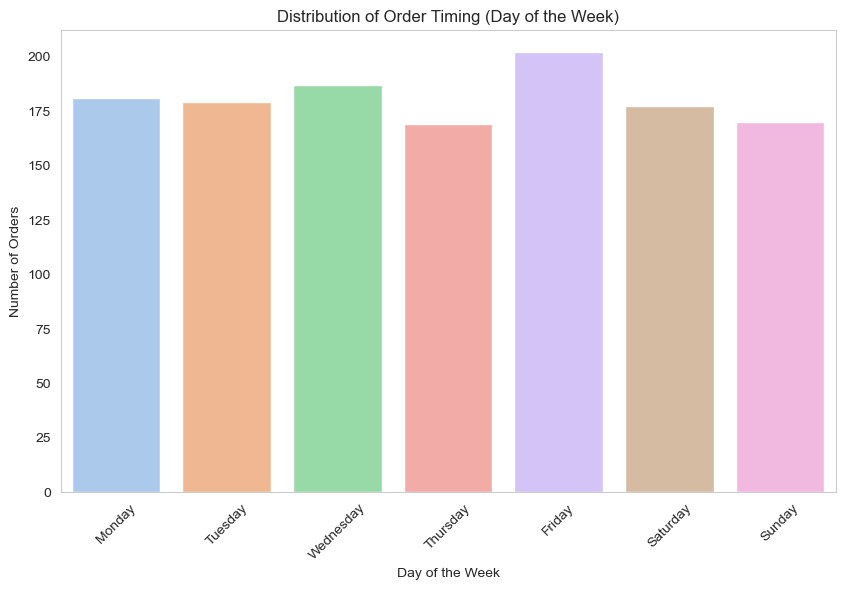

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")
# Plot distribution of order timing: day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=fixed_transactions_df, x='Day_of_Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Order Timing (Day of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

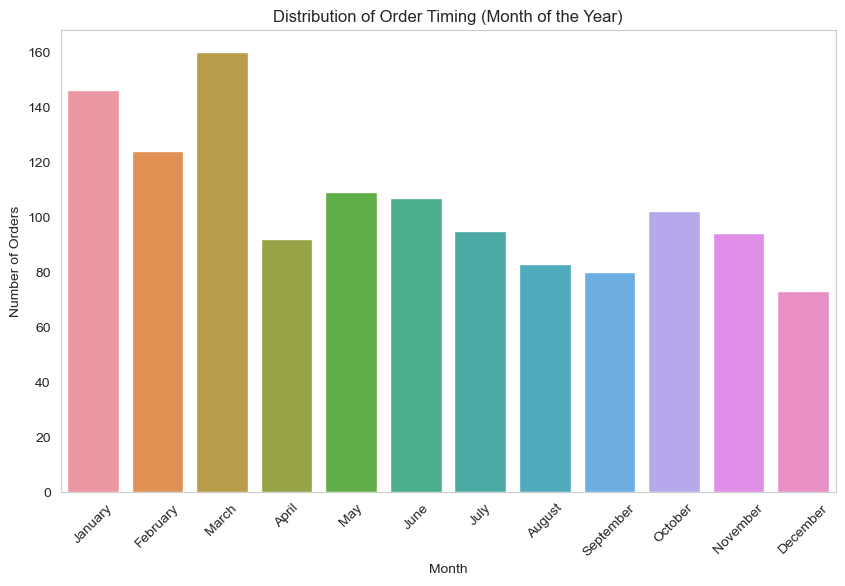

In [67]:
# Plot distribution of order timing: month of the year
plt.figure(figsize=(10, 6))
sns.countplot(data=fixed_transactions_df, x='Month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Distribution of Order Timing (Month of the Year)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Task 6: Which payment method is providing more discount for customers?

In [40]:
fixed_transactions_df['Discount'] = fixed_transactions_df['Price '] - fixed_transactions_df['Selling_price']
discount_by_payment = fixed_transactions_df.groupby('Payment Method')['Discount'].sum()

C:\Users\junsu\AppData\Local\Temp\ipykernel_17980\233613368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_transactions_df['Discount'] = fixed_transactions_df['Price '] - fixed_transactions_df['Selling_price']


In [63]:
discount_by_payment.to_csv('T6output.csv')

In [42]:
# Task 7: Create a profile for high value items vs low value items and relate that wrt to their number of orders
fixed_transactions_df['Value'] = pd.qcut(fixed_transactions_df['Price '], q=2, labels=['Low', 'High'])
value_profile = fixed_transactions_df.groupby('Value')['Product_ID'].count()

C:\Users\junsu\AppData\Local\Temp\ipykernel_17980\1881228741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_transactions_df['Value'] = pd.qcut(fixed_transactions_df['Price '], q=2, labels=['Low', 'High'])


In [64]:
value_profile.to_csv('T7output.csv')

In [44]:
# Task 8: Do you think if merchant provides more discount then can it will lead to increase in number of orders?
discount_orders_corr = fixed_transactions_df[['Discount', 'Product_ID']].corr().iloc[0, 1]

In [66]:
discount_orders_corr

0.016794521062690845